<a href="https://colab.research.google.com/github/masoud-n91/MachineLearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [142]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [143]:
data.replace(("female", "male"), (0, 1), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# data.fillna(0, inplace=True)

In [144]:
temp_df = data.dropna(subset=['Age'])
age_list = temp_df['Age'].tolist()
mean_age = np.mean(age_list)
data.fillna(mean_age, inplace=True)

In [136]:
X = np.array(data[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y = np.array(data[["Survived"]])

In [145]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

**Model**

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation="relu"), # input layer
    tf.keras.layers.Dense(36, activation="relu"), # first hidden layer
    tf.keras.layers.Dense(16, activation="relu"), # Second hidden layer
    tf.keras.layers.Dense(2, activation="softmax") # Output layer
])

In [147]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [148]:
output = model.fit(X_train,Y_train, epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 1ms/step - loss: 1.2805 - accuracy: 0.4295
Epoch 2/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6355
Epoch 3/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6380
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6380
Epoch 5/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6404
Epoch 6/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6417
Epoch 7/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6442
Epoch 8/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.6442
Epoch 9/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6417
Epoch 10/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.6417
Epoch 11/

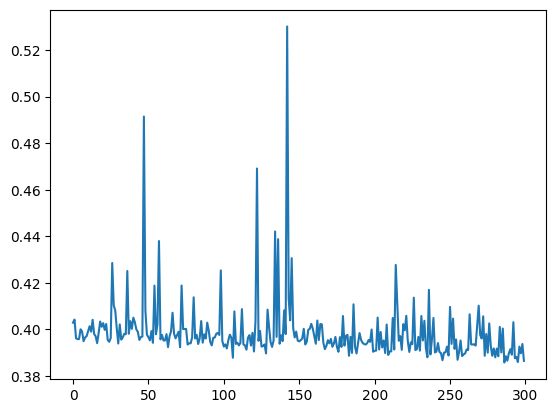

In [62]:
plt.plot(output.history["loss"])
plt.show()

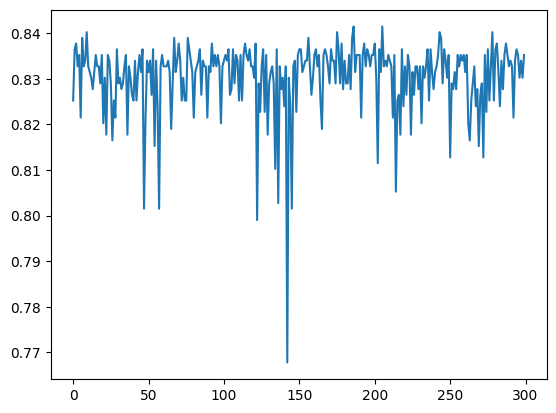

In [63]:
plt.plot(output.history["accuracy"])
plt.show()